Product popularity based recommendation system targeted at new customers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import tensorflow as tf
import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
amazon_ratings = pd.read_csv('./ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head(10)


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [3]:
amazon_ratings.shape

(128684, 4)

In [4]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(20)

,Rating
ProductId,
B0000YUXI0,2143
B000142FVW,1558
B00021DVCQ,1051
B0002JKPA4,1046
B00016XJ4M,845
B00067YSLO,795
B00006IV2F,704
B0000632EN,686
B0002Z8HAI,680


<Axes: xlabel='ProductId'>

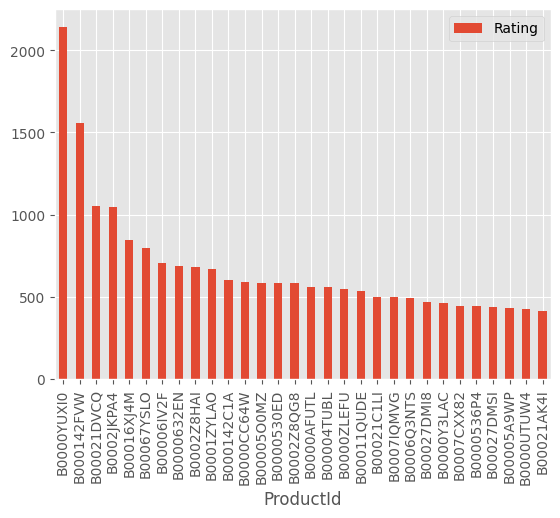

In [5]:
most_popular.head(30).plot(kind = "bar")

The above graph gives us the most popular products (arranged in descending order) sold by the business.
Product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc.

In [40]:
# Subset of Amazon Ratings
amazon_ratings1 = amazon_ratings.head(10000)

In [41]:
amazon_ratings1

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
9995,A9V4K2YJ2DWTQ,B000052YQ2,3.0,1396396800
9996,A3033CXHQ0NF8J,B000052YQ2,5.0,1291248000
9997,A1Z66KHEXSF3L5,B000052YQ2,3.0,1361577600
9998,A1Y7D2DRVBN59D,B000052YQ2,5.0,1402099200


In [7]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
ratings_utility_matrix.shape

(9697, 886)

In [9]:
#transposing the matrix
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X.shape

(886, 9697)

In [11]:
X1 = X

Decomposing the matrix

In [12]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [13]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

Assuming the customer buys Product ID # 6117036094 (randomly chosen)
Isolating this Product ID from Correlation matrix

In [14]:
X.index[99]

'6117036094'

In [15]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [16]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

Recommending top 10 highly correlated products in sequence

In [17]:
Recommend = list(X.index[correlation_product_ID > 0.90])
# Removes the item already bought by the customer
Recommend.remove(i)
Recommend[0:9]

['0205616461',
 '0558925278',
 '0733001998',
 '1304139220',
 '130414089X',
 '130414674X',
 '1304174778',
 '1304196046',
 '1304196062']

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs

In [21]:
product_descriptions = pd.read_csv('./product_descriptions.csv')

In [23]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [24]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

Converting the text in product description into numerical data for analysis

In [25]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

Visualizing product clusters in subset of data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


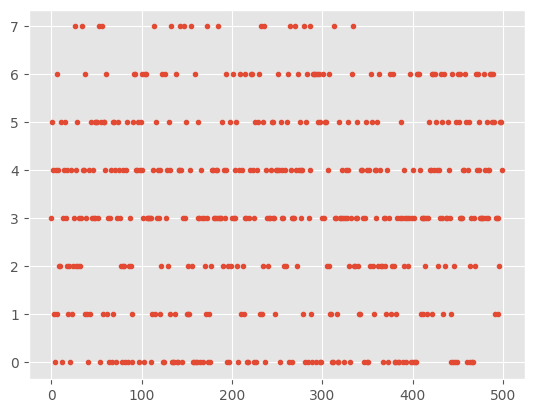

In [50]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 8, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [51]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

array(['00', '000', '000light', ..., 'zipper', 'zmax', 'zone'],
      dtype=object)

In [99]:
true_k =80

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 ladder
 step
 werner
 face
 steps
 folding
 standing
 work
 conveniently
 stool
Cluster 1:
 fan
 ceiling
 light
 help
 guide
 reversible
 hampton
 helpful
 bay
 blades
Cluster 2:
 gripstrip
 flooring
 real
 36
 existing
 offers
 vinyl
 installation
 floor
 maintainrefer
Cluster 3:
 nailer
 tool
 free
 exhaust
 ridgid
 depth
 18
 mast
 antenna
 work
Cluster 4:
 cycle
 wash
 drum
 dryer
 clothes
 dry
 washer
 steam
 cycles
 load
Cluster 5:
 wood
 slab
 natural
 door
 desk
 finished
 handing
 core
 veneers
 mulch
Cluster 6:
 water
 media
 harmful
 sediment
 shelter
 filter
 dependable
 years
 solvents
 sideline
Cluster 7:
 fencing
 bamboo
 reed
 wires
 panels
 friendly
 galvanized
 quality
 customers
 anji
Cluster 8:
 water
 heater
 valve
 gas
 nox
 tank
 pressure
 hot
 air
 warranty
Cluster 9:
 metal
 drill
 screw
 gauge
 hex
 screws
 bit
 self
 gun
 point
Cluster 10:
 seal
 leaks
 roofing
 leakseal
 moisture
 water
 silicone
 cracks
 rubberized
 metal


Predicting clusters based on key search words

In [95]:
#defining function to display the recommendation based on the keyword used
def show_recommendations(product):
    Y= vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])
    return prediction

In [100]:
#using the keyword="water"
pred=show_recommendations("water")

Cluster 8:
 water
 heater
 valve
 gas
 nox
 tank
 pressure
 hot
 air
 warranty


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.